# K-means for Clustering

In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
from copy import deepcopy

In [12]:
from sklearn import datasets
dataset = pd.DataFrame(datasets.load_iris()["data"],columns=datasets.load_iris()["feature_names"])
data = dataset.as_matrix()
dataset["label"] = pd.DataFrame(datasets.load_iris()["target"])
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
print datasets.load_iris()['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<IPython.core.display.Javascript object>


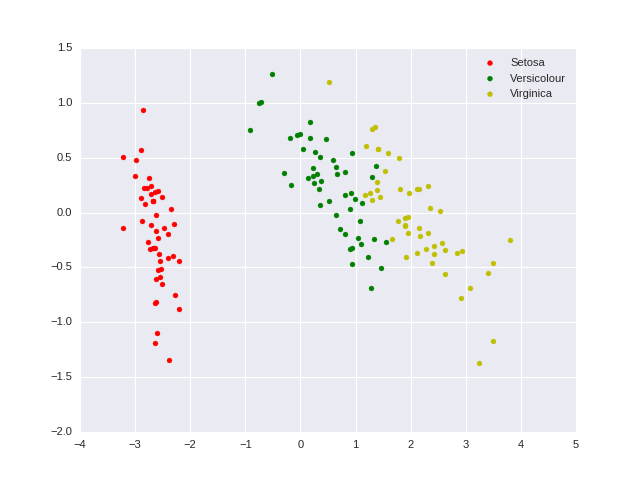

In [14]:
#We shrink the dataset to visualize the three classes!
#We see that the two clusters Versicolour and Virginica are very near.
#We will apply K-means on the original dataset and find the clusters 
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
shrink = PCA(n_components = 2)
data_2d = shrink.fit_transform(data)
setosa_data_2d = data_2d[0:50,:]
verico_data_2d = data_2d[50:100,:]
virginia_data_2d = data_2d[100:150,:]
plt.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Setosa")
plt.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versicolour')
plt.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virginica")
plt.legend()

# K- means 
K-means is a clustering algorithm. It uses K cluster centers and a distance metric to decide which cluster a particular point belongs to.
There are many choices for distance metric simplest being euclidean distance. 
$$d(P_1,P_2) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2 + . . . . . }$$

We can reduce the workload by skipping square root step.

The algorithm is very easy to implement and has fast convergence

Drawback of this algorithm is sensitivity to initial cluster center. Bad cluster centers can lead to convergence to local minima 

In [24]:
def euclidean_distance(p1,p2):
    dif = p1 - p2
    return np.square(dif).sum(axis = 1)

In [25]:
k = 3        #k for k-means
#random initial centroid
from numpy import random
random.seed(231)        #seed for same results
initial = random.randint(0,data.shape[0],size = k)
centroids = data[initial,:]
print initial ,"\n", centroids

[ 87 148  11] 
[[ 6.3  2.3  4.4  1.3]
 [ 6.2  3.4  5.4  2.3]
 [ 4.8  3.4  1.6  0.2]]


In [26]:
def k_means(data,centroids,max_iter,):
    now_iter = 0
    cluster_distance = np.zeros((data.shape[0],centroids.shape[0]))
    cluster = np.zeros((data.shape[0]))

    old = np.zeros(centroids.shape)
    convergence = False
    #while convergence not reached
    while (not convergence) and (now_iter < max_iter):
        #store old centroids
        old = deepcopy(centroids)
        
        #calculating distance of each point from cluster centers
        for i in range(k):
            cluster_distance[:,i] = euclidean_distance(data,centroids[i])

        #calculating cluster assignments
        cluster = np.argmin(cluster_distance,axis = 1)
        
        #new cluster assignments
        for i in range(k):
            centroids[i] = data[cluster == i].mean(axis = 0)
        
        #check if the centers are same
        if np.allclose(centroids,old,rtol = 1e-4,atol=1e-4):
            convergence = True
            print "Reached Convergence on iteration", now_iter
        #check if iterations maxed out
        if now_iter == max_iter:
            convergence == True
            print "Reached max_iter"

        now_iter += 1

        
    return cluster,centroids

In [27]:
def predict(test_data,centroids):
    k = centroids.shape[1]
    cluster_distance = np.zeros((test_data.shape[0],k))
    cluster = np.zeros((test_data.shape[0]))

    for i in range(k):
        cluster_distance[:,i] = euclidean_distance(test_data,centroids[i])

        #calculating cluster assignments
        cluster = np.argmin(cluster_distance,axis = 1)
    return cluster

In [28]:
cluster_assignment,centroids = k_means(data,centroids,100)

Reached Convergence on iteration 4


<IPython.core.display.Javascript object>


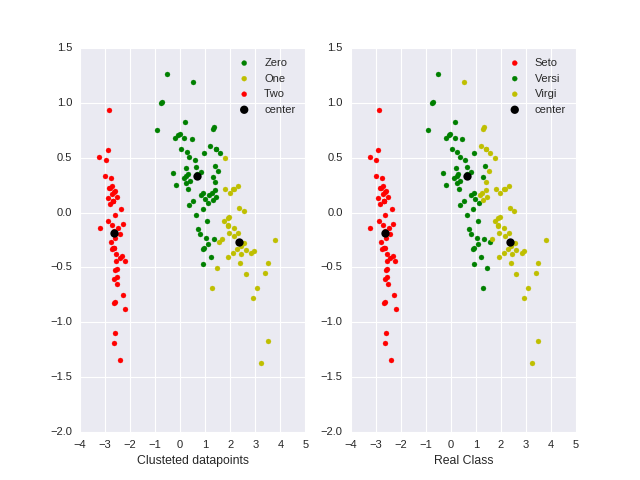

In [38]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()


centers = shrink.transform(centroids)


zero_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if cluster_assignment[i] == 0 ])
one_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if cluster_assignment[i] == 1 ])
two_data_2d = np.array([data_2d[i] for i in range(data.shape[0]) if cluster_assignment[i] == 2 ])


ax = fig.add_subplot(1,2,1)
ax.scatter(zero_data_2d[:,0],zero_data_2d[:,1],color = 'g',label = "Zero")
ax.scatter(one_data_2d[:,0],one_data_2d[:,1],color = 'y',label = 'One')
ax.scatter(two_data_2d[:,0],two_data_2d[:,1],color = 'r',label = "Two")
ax.scatter(centers[:,0],centers[:,1],color = 'black',label = "center",marker = "o",linewidth =3)
ax.legend()
ax.set_xlabel("Clusteted datapoints")

setosa_data_2d = data_2d[0:50,:]
verico_data_2d = data_2d[50:100,:]
virginia_data_2d = data_2d[100:150,:]

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(setosa_data_2d[:,0],setosa_data_2d[:,1],color = 'r',label = "Seto")
ax2.scatter(verico_data_2d[:,0],verico_data_2d[:,1],color = 'g',label = 'Versi')
ax2.scatter(virginia_data_2d[:,0],virginia_data_2d[:,1],color = 'y',label = "Virgi")
ax2.scatter(centers[:,0],centers[:,1],color = 'black',label = "center",marker = "o",linewidth =3)
ax2.legend()
ax2.set_xlabel("Real Class")


<IPython.core.display.Javascript object>


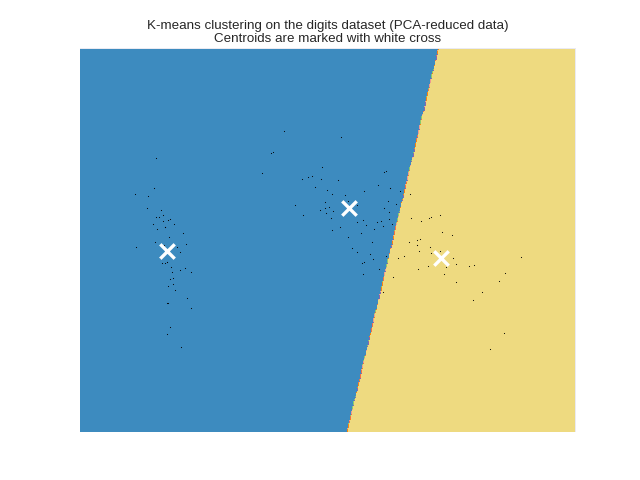

In [40]:
# Doesn't plot the three voronoi! #TODO
"""
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
reduced_data = deepcopy(data_2d)
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
centroids1 = deepcopy(centers)

# Obtain labels for each point in mesh. Use last trained model.
Z =predict(np.c_[xx.ravel(), yy.ravel()],centroids1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(3)
plt.clf()
plt.contourf(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
plt.scatter(centroids1[:, 0], centroids1[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()"""

In [41]:
predict(np.c_[xx.ravel(),yy.ravel()],centers)

array([0, 0, 0, ..., 1, 1, 1])